In [1]:
import numpy as np
import pandas as pd
import os
import skimage
import skimage.io as io
from skimage.transform import rescale, resize
from collections import namedtuple
from collections import Counter
import tensorflow as tf

pd.options.display.max_seq_items = None

In [2]:
IMG_W = 256
IMG_H = 256
CHANNELS = 1

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 50
BATCH_SIZE = 20

In [3]:
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [4]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("elu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("elu"))
  
model.add(Conv2D(128,(3,3)))
model.add(Activation("elu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("elu"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("elu"))
model.add(MaxPool2D(2,2))
    
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [6]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=["binary_crossentropy", 'accuracy']
)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      320       
_________________________________________________________________
activation (Activation)      (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        1

In [8]:
temp = []
for root, dirs, files in os.walk(r"C:\Users\Lenovo\OneDrive\data\covid\images\resized256x256\images"):
    for file in files:
        temp.append(
            (
                int(file.split(".")[0]),
                io.imread(os.path.join(root, file), as_gray=True)
            )
        )
        if temp[-1][1].max() > 1:
            temp[-1] = (temp[-1][0], temp[-1][1]/255)

In [9]:
temp.sort(key=lambda x: x[0])

In [10]:
X = np.array([i[1] for i in temp])

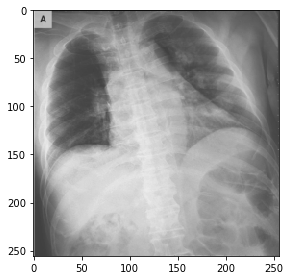

In [27]:
io.imshow(X[0])

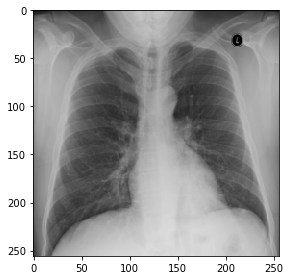

In [29]:
io.imshow(X[-2])

In [11]:
temp = pd.read_csv(r"C:\Users\Lenovo\OneDrive\data\covid\images\resized256x256\data.tsv",sep="\t")

In [12]:
y = np.array(temp.finding)

In [13]:
Counter(y)

Counter({True: 552, False: 357})

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train = (tf.expand_dims(X_train, axis=-1))
X_test = (tf.expand_dims(X_test, axis=-1))

In [16]:
tf.config.run_functions_eagerly(True)

In [17]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [18]:
%%time

history = model.fit(
    X_train, 
    y_train, 
    epochs=EPOCHS, 
    batch_size=BATCH_SIZE, 
    shuffle=True, 
    class_weight={True:2, False:1},
    validation_data=(X_test, y_test)
)

C:\Users\Lenovo\anaconda3\envs\tf-gpu-cuda8\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


Epoch 1/50
37/37 [==============================] - 14s 268ms/step - loss: 2.0360 - binary_crossentropy: 1.3421 - accuracy: 0.5786 - val_loss: 0.6275 - val_binary_crossentropy: 0.6275 - val_accuracy: 0.6703
Epoch 2/50
37/37 [==============================] - 8s 222ms/step - loss: 0.8832 - binary_crossentropy: 0.7143 - accuracy: 0.6068 - val_loss: 0.6299 - val_binary_crossentropy: 0.6299 - val_accuracy: 0.6703
Epoch 3/50
37/37 [==============================] - 8s 220ms/step - loss: 0.9306 - binary_crossentropy: 0.7240 - accuracy: 0.5587 - val_loss: 0.6522 - val_binary_crossentropy: 0.6522 - val_accuracy: 0.6703
Epoch 4/50
37/37 [==============================] - 8s 220ms/step - loss: 0.8426 - binary_crossentropy: 0.6890 - accuracy: 0.6232 - val_loss: 0.6354 - val_binary_crossentropy: 0.6354 - val_accuracy: 0.6703
Epoch 5/50
37/37 [==============================] - 8s 220ms/step - loss: 0.8602 - binary_crossentropy: 0.6972 - accuracy: 0.6149 - val_loss: 0.5915 - val_binary_crossentropy:

37/37 [==============================] - 7s 182ms/step - loss: 0.0859 - binary_crossentropy: 0.0676 - accuracy: 0.9825 - val_loss: 1.1047 - val_binary_crossentropy: 1.1047 - val_accuracy: 0.7418
Epoch 41/50
37/37 [==============================] - 7s 182ms/step - loss: 0.0783 - binary_crossentropy: 0.0590 - accuracy: 0.9903 - val_loss: 1.1886 - val_binary_crossentropy: 1.1886 - val_accuracy: 0.7582
Epoch 42/50
37/37 [==============================] - 7s 182ms/step - loss: 0.0482 - binary_crossentropy: 0.0379 - accuracy: 0.9894 - val_loss: 1.1643 - val_binary_crossentropy: 1.1643 - val_accuracy: 0.7363
Epoch 43/50
37/37 [==============================] - 7s 182ms/step - loss: 0.0393 - binary_crossentropy: 0.0305 - accuracy: 0.9995 - val_loss: 1.1582 - val_binary_crossentropy: 1.1582 - val_accuracy: 0.7692
Epoch 44/50
37/37 [==============================] - 7s 182ms/step - loss: 0.0377 - binary_crossentropy: 0.0265 - accuracy: 1.0000 - val_loss: 1.2324 - val_binary_crossentropy: 1.2324 

In [19]:
pred = model.predict(X_test)
pred[:3]

array([[0.99999964],
       [0.9999939 ],
       [0.00731309]], dtype=float32)

In [20]:
y_test[:3]

array([ True,  True,  True])

In [78]:
pred_boolean = pred.reshape(-1) >= 0.5

In [79]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_boolean))

              precision    recall  f1-score   support

       False       0.66      0.65      0.66        60
        True       0.83      0.84      0.83       122

    accuracy                           0.77       182
   macro avg       0.75      0.74      0.74       182
weighted avg       0.77      0.77      0.77       182



In [80]:
import matplotlib.pyplot as plt

def plot_beautiful(x, y, *args, ylim=None, width=20, height=10):

    fig, ax = plt.subplots()
    ax.plot(x, y, color="g", label=1)
    
    for i,y in enumerate(args):
        ax.plot(x, y, label=i+2)
    
    ax.set_ylabel("metric")
    ax.set_xlabel("epoch")
    
    ax.set_ylim(ylim)
        
    fig.set_figwidth(width)
    fig.set_figheight(height)

    ax.set_facecolor('seashell')
    fig.set_facecolor('floralwhite')
    
    plt.legend()
    
    plt.show()

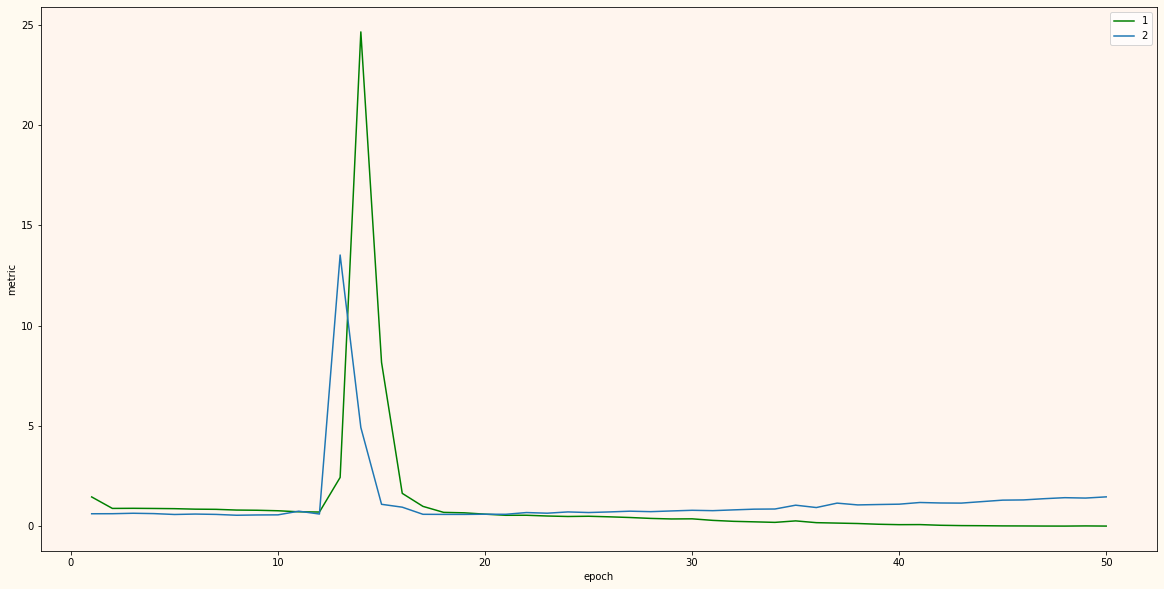

In [81]:
plot_beautiful(np.arange(len(history.history["loss"]))+1,history.history["loss"], history.history["val_loss"])

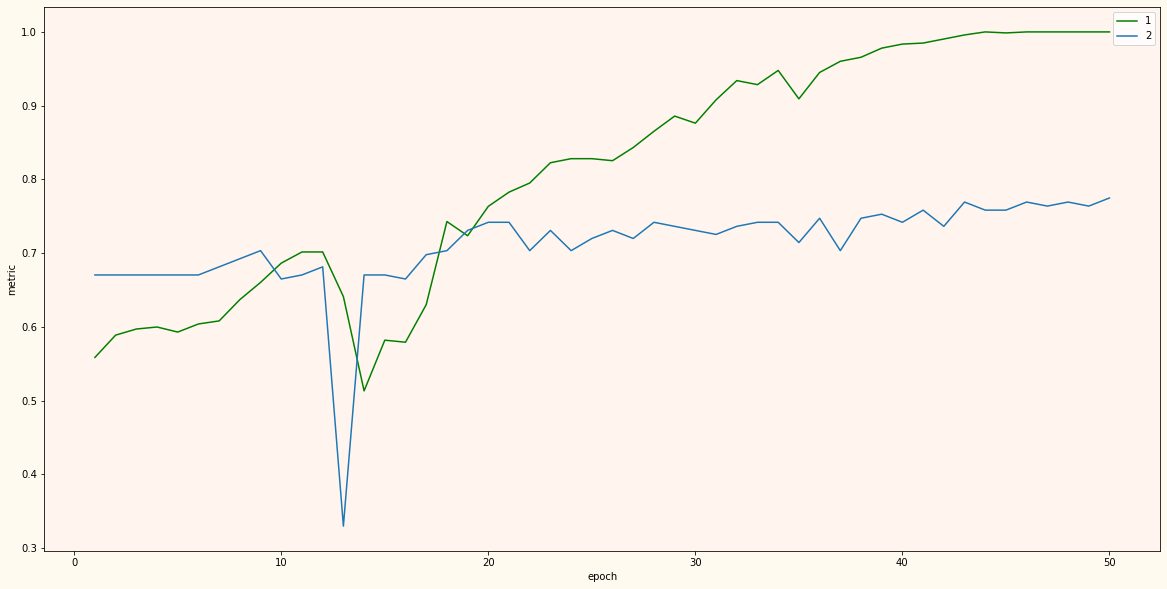

In [82]:
plot_beautiful(np.arange(len(history.history["accuracy"]))+1,history.history["accuracy"], history.history["val_accuracy"])

In [83]:
# model.save(r"C:\Users\Lenovo\OneDrive\data\covid\nn_models\1")

INFO:tensorflow:Assets written to: C:\Users\Lenovo\OneDrive\data\covid\nn_models\1\assets


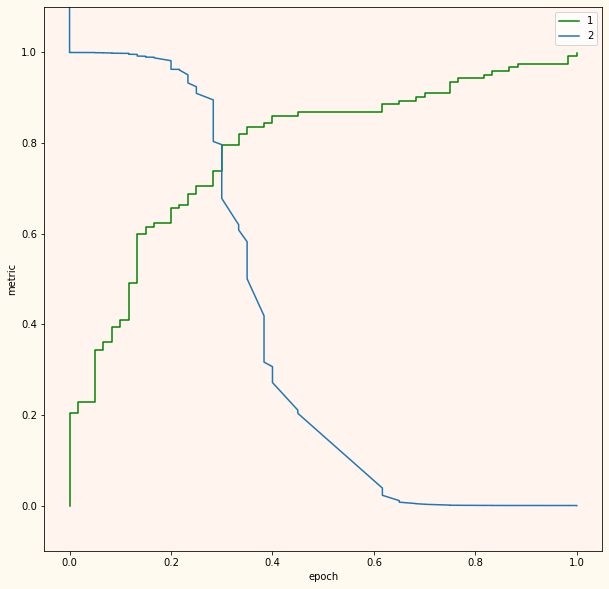

In [84]:
from sklearn.metrics import roc_curve

plot_beautiful(*roc_curve([1 if i else 0 for i in y_test], pred.reshape(-1), pos_label=1), ylim=(-0.1,1.1), width=10)